<a href="https://colab.research.google.com/github/leandrokiyoshi/acidentes-aereos-projeto/blob/main/projet%C3%A3o_Ciencia_de_Dados(c%C3%B3pia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bibliotecas

In [ ]:
# instalar o pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 565 kB 13.8 MB/s 


In [ ]:
# Bibliotecas
import pandas as pd

import numpy as np # linear algebra

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import plotly.express as px

from collections import Counter
import statistics as static

import matplotlib.pyplot as plt
from pywaffle import Waffle

import seaborn as sns

# instalar o pywaffle
!pip install pywaffle -q

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
spreasheet = gc.open('ocorrencias_cenipa')

In [ ]:
page = spreasheet.sheet1

##Análise Exploratória do Dataset



*   Nesta etapa vamos entender como os dados estão estruturados e identificar os padrões que compoem o dataset. Precisamos também fazer algumas validações básicas como: verificar se há duplicidade de registros, a consistência dos dados e avaliar o tipo de distribuição das variáveis.


In [ ]:
# Verificando os valores e campos que compoem o Dataset.
page.row_values(1)

['codigo',
 'tipo',
 'descricao',
 'cidade',
 'estado',
 'data',
 'ano',
 'hora',
 'aeronave_liberada',
 'status_investigacao',
 'aeronaves_envolvidas',
 'ocorrencia_saida_pista',
 'aeronave_tipo',
 'aeronave_fabricante',
 'motor_tipo',
 'aeronave_motor_quantidade',
 'aeronave_assentos',
 'aeronave_ano_fabricacao',
 'aeronave_pais_fabricante',
 'aeronave_fase_operacao',
 'aeronave_nivel_dano']

In [ ]:
# Criando DataFrame da base de dados
acidentes = pd.DataFrame(page.get_all_records())

In [ ]:
#Informações do Dataset
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo                     5242 non-null   int64 
 1   tipo                       5242 non-null   object
 2   descricao                  5242 non-null   object
 3   cidade                     5242 non-null   object
 4   estado                     5242 non-null   object
 5   data                       5242 non-null   object
 6   ano                        5242 non-null   int64 
 7   hora                       5242 non-null   object
 8   aeronave_liberada          5242 non-null   object
 9   status_investigacao        5242 non-null   object
 10  aeronaves_envolvidas       5242 non-null   int64 
 11  ocorrencia_saida_pista     5242 non-null   object
 12  aeronave_tipo              5242 non-null   object
 13  aeronave_fabricante        5242 non-null   object
 14  motor_ti

In [ ]:
# Verficar se há linhas duplicadas, se sim ele retorna o valor como "true"
acidentes.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5237    False
5238    False
5239    False
5240    False
5241    False
Length: 5242, dtype: bool

In [ ]:
# Quantidade de valores unicos em cada coluna
acidentes.nunique()

codigo                       5242
tipo                            3
descricao                      75
cidade                       1042
estado                         27
data                         2697
ano                            10
hora                          921
aeronave_liberada               3
status_investigacao             3
aeronaves_envolvidas            3
ocorrencia_saida_pista          2
aeronave_tipo                  10
aeronave_fabricante           223
motor_tipo                      6
aeronave_motor_quantidade       6
aeronave_assentos              87
aeronave_ano_fabricacao        79
aeronave_pais_fabricante       20
aeronave_fase_operacao         32
aeronave_nivel_dano             5
dtype: int64

In [ ]:
#visualizando o cabeçalho do dataset

acidentes.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


##1. Quantas variáveis e quantos registros o nosso conjunto de dados possui? 

Vamos identificar a quantidade de entradas que nosso conjunto de dados possui.

In [ ]:
# identificar os seguintes pontos: volume de dados, quantidade de variáveis, quantidade distinta de imóveis, se há duplicidade de registros e se há duplicidade nos campos chave;
print("Entradas: {}".format(acidentes.shape[0]))
print("Variáveis: {}\n".format(acidentes.shape[1]))
print("Quantidade distinta de aeronaves: {}".format(len(acidentes['aeronave_tipo'].unique().tolist())))
print("Registros duplicados: {}".format(acidentes.duplicated().sum()))
print("Campo chave duplicado:{}".format(acidentes[['codigo']].duplicated().sum()))

Entradas: 5242
Variáveis: 21

Quantidade distinta de aeronaves: 10
Registros duplicados: 0
Campo chave duplicado:0


##2. Qual a porcentagem de valores ausentes no dataset? 

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# verificando dados ausentes
(acidentes.isnull().sum()).sort_values(ascending=False)

codigo                       0
ocorrencia_saida_pista       0
aeronave_fase_operacao       0
aeronave_pais_fabricante     0
aeronave_ano_fabricacao      0
aeronave_assentos            0
aeronave_motor_quantidade    0
motor_tipo                   0
aeronave_fabricante          0
aeronave_tipo                0
aeronaves_envolvidas         0
tipo                         0
status_investigacao          0
aeronave_liberada            0
hora                         0
ano                          0
data                         0
estado                       0
cidade                       0
descricao                    0
aeronave_nivel_dano          0
dtype: int64

É posssível notar que os campos do dataset não existem valores nulos, podendo assim afirmar que a qualidade do dataset é ideal para realizar análises

##3. Há outliers presentes? 

Analisando o DataSet existem outliers que podem prejudicar as análises?
Vamos descobrir.

In [ ]:
# verificando a distribuição estatística
acidentes[['aeronaves_envolvidas','aeronave_assentos']].describe().round(1)

,aeronaves_envolvidas,aeronave_assentos
count,5242.0,5242.0
mean,1.0,27.6
std,0.1,54.5
min,1.0,0.0
25%,1.0,2.0
50%,1.0,6.0
75%,1.0,10.0
max,3.0,384.0


# RESULTADO EM GRÁFICO DAS AERONAVES ENVOLVIDAS X AERONAVE ASSENTOS!!

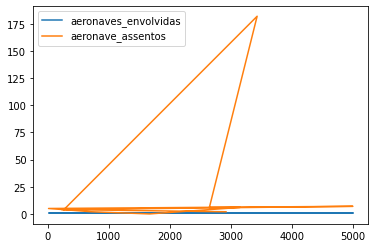

In [ ]:
# LEMBRETE: APLICAR PARAMETROS PARA MELHORAR O GRÁFICO
df_result = acidentes[['aeronaves_envolvidas', 'aeronave_assentos']].sample(10).sample(10)
df_result.plot()

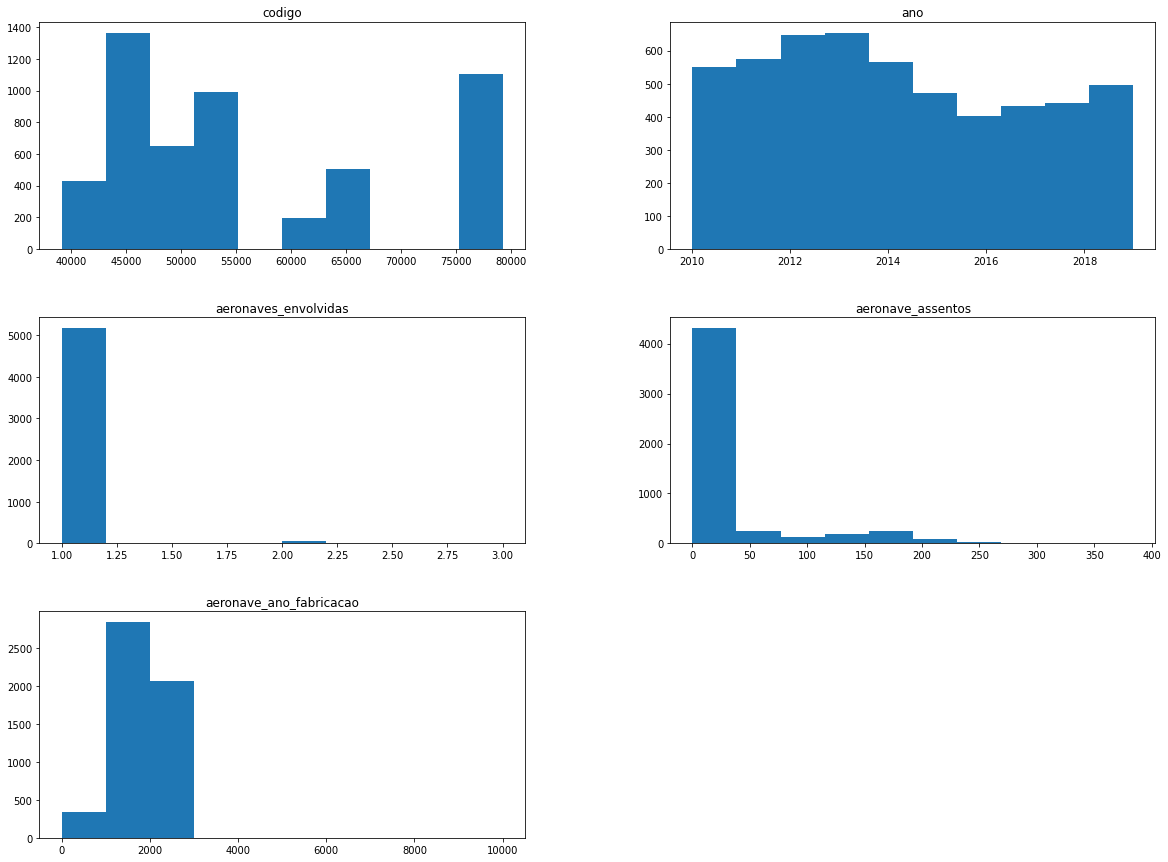

In [ ]:
# verificando as distribuições
acidentes.hist(figsize=(20,15), grid=False);

##4. Qual a correlação existente entre as variáveis? 

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn

In [ ]:
# criar uma matriz de correlação
corr = acidentes[['aeronaves_envolvidas','aeronave_assentos','aeronave_ano_fabricacao','ano']].corr()

# mostrar a matriz de correlação
display(corr)

,aeronaves_envolvidas,aeronave_assentos,aeronave_ano_fabricacao,ano
aeronaves_envolvidas,1.000000,-0.006982,-0.025948,0.032272
aeronave_assentos,-0.006982,1.000000,0.023408,-0.024765
aeronave_ano_fabricacao,-0.025948,0.023408,1.000000,-0.171178
ano,0.032272,-0.024765,-0.171178,1.000000


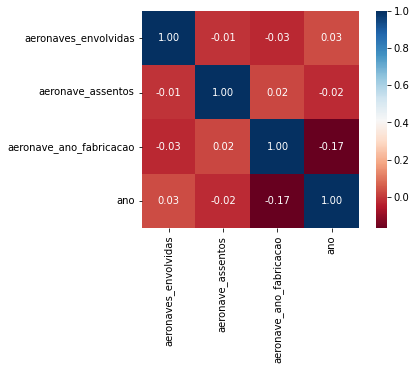

In [ ]:
# plotando um mapa de calor a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Analisando as correlações acima é possível afirmar que as variáveis não possuem correlações fortes, o que nos permite evitar com que o modelo de regressão não entre em variáveis com fortes correlações.


#Resultados - Análise Exploratória do Dataset

*   Foi feita apenas uma análise superficial na base de dados, porém já se percebeu que não existem muito Outliers ou percentual preocupante de dados nulos. 

*   Também notamos que existe uma correlação em algumas variáveis do Dataset, onde vamos aprofundar as análises nos próximos tópicos

*   Por fim, lembra-se que esta é uma análise inicial resumida do Dataset podendo assim saber quais são os possíveis problemas ou divergências que podemos encontrar ao analisar o Dataset total.






#Análise dos Dados e Insights

Finalizada a análise explaratória dos dados, agora vamos começar a analisar os dados da base de "Ocorrências_Cenipa (2010-2019).

In [ ]:
#Plotando número nos Gráficos em Barras Horizontais
def rotulo_linhas(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

#Análises por Regiões x Tipos de Ocorrências

In [ ]:
#divindo as ocorrências por região
dic_regioes = {'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
                'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
                'Centro Oeste': ['MT', 'MS', 'GO'], 
                'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
                'Sul': ['PR', 'RS', 'SC']}
tipos = ['ACIDENTE', 'INCIDENTE','INCIDENTE GRAVE']
dic_01 = {i: [ len([k for k in list(acidentes.loc[acidentes['tipo'] == i, ['estado']]['estado'])
                    if k in dic_regioes[j]]) for j in dic_regioes.keys()] for i in tipos}

dic_01['Região'] = list(dic_regioes.keys())
dados_regioes = pd.DataFrame(dic_01)

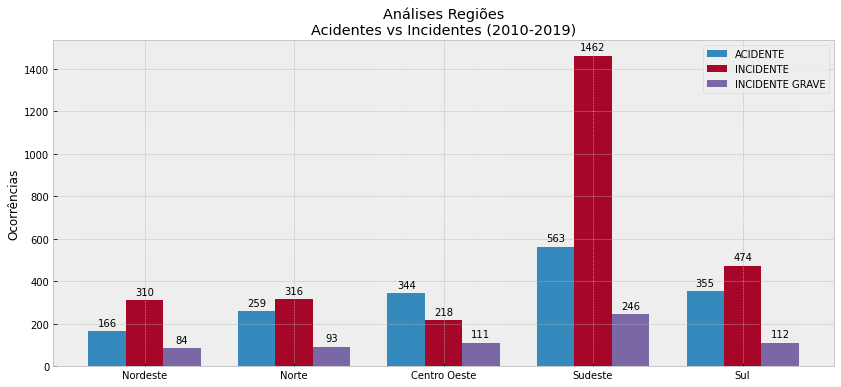

In [ ]:
#Visualizando a primeira análise por região em um gráfico de barras horizontais
plt.style.use("bmh")
fig, ax = plt.subplots(figsize=(14, 6))

width = 0.25
r1 = np.arange(5)
r2 = [ x + width for x in r1]
r3 = [ x + width for x in r2]

rects1 = ax.bar(r1, dados_regioes['ACIDENTE'], width, label='ACIDENTE')
rects2 = ax.bar(r2, dados_regioes['INCIDENTE'], width, label='INCIDENTE')
rects3 = ax.bar(r3, dados_regioes['INCIDENTE GRAVE'], width, label='INCIDENTE GRAVE')

ax.set_ylabel('Ocorrências')
ax.set_title('Análises Regiões\nAcidentes vs Incidentes (2010-2019)')
ax.set_xticks(r2)
ax.set_xticklabels(dados_regioes['Região'])
ax.legend()

rotulo_linhas(rects1, ax)
rotulo_linhas(rects2, ax)
rotulo_linhas(rects3, ax)

plt.show()

#Análise de ocorrência por estado

In [ ]:
estado = Counter(acidentes['estado'])
fase_estado = sorted(estado, key = estado.get, reverse = True)
contador_estado = sorted(list(estado.values()), reverse = True)

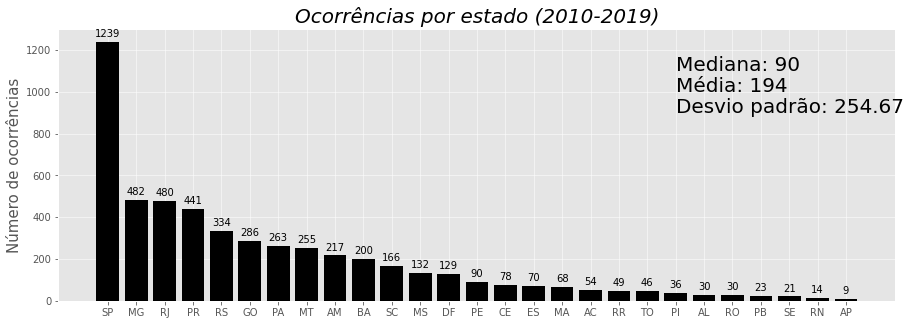

In [ ]:
plt.style.use("ggplot")

fig,ax = plt.subplots(figsize=(15,5))#tamanho do grafico

x=fase_estado
y=contador_estado

rects1=ax.bar(x, y,color='black')#barras do grafico 

ax.set_xticks(x)
plt.title('Ocorrências por estado (2010-2019)',style='italic', size=20) #titulo principal
plt.ylabel("Número de ocorrências", size=15)# titulo a esquerda
plt.text(20, 1000.9, 'Média: %d'%(np.mean(np.array(contador_estado))),size=20) #legenda
plt.text(20, 1100.9, 'Mediana: %d'%(np.median(np.array(contador_estado))),size=20)#legenda
plt.text(20, 900.8, 'Desvio padrão: %.2f'%(static.stdev(contador_estado)),size=20)  #legenda 

plt.grid(True,color='white') #quadrados no grafico
rotulo_linhas(rects1, ax)
plt.show()

Nota-se que SP foi o estado com o maior numero de ocorrências neste periodo com 1239 casos, visto que, concentra maior parte dos voos comerciais, e grande volume de voos privados.

O estado com menor quantidade de ocorrências foi o AP, com 9, devido a baixa demanda de voos.

A média de ocorrência por estado ficou em 194 durante esse período. Quantidade elevada, em razão a grande quantidade de ocorrências em São Paulo.

#Ocorrências por cidade

In [ ]:
cidade = Counter(acidentes['cidade'])
fase_cidade = sorted(cidade, key = cidade.get, reverse = True)
contador_cidade = sorted(list(cidade.values()), reverse = True)

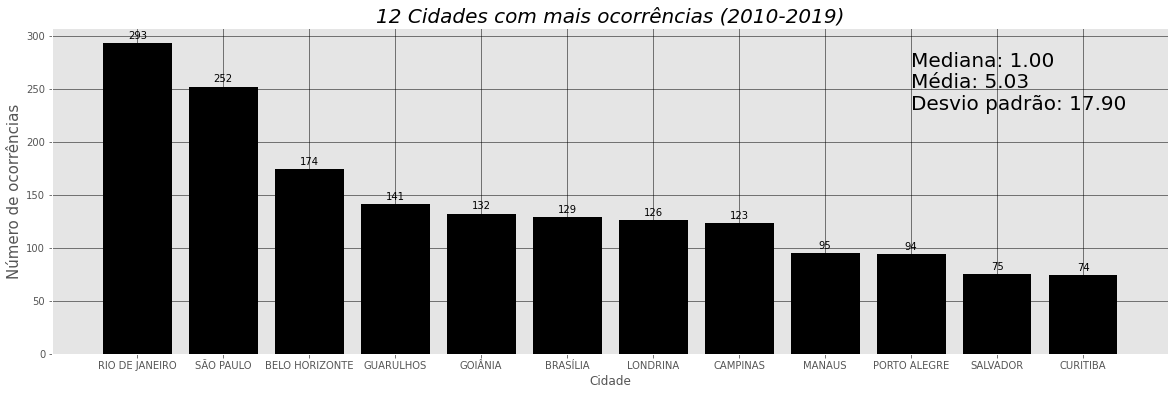

In [ ]:
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(20,6))

x=fase_cidade[:12]
y=contador_cidade[:12]

rects1=ax.bar(x, y,color='black')

plt.xlabel('Cidade')
ax.set_xticks(x)
plt.ylabel("Número de ocorrências",size=15)
plt.title('12 Cidades com mais ocorrências (2010-2019)',size=20,style='italic')
plt.text(9, 270.9, 'Mediana: %.2f'%(np.median(np.array(contador_cidade))),size=20)
plt.text(9, 250.9, 'Média: %.2f'%(np.mean(np.array(contador_cidade))),size=20)
plt.text(9, 230.8, 'Desvio padrão: %.2f'%(static.stdev(contador_cidade)),size=20)   

plt.grid(True,color='black')
rotulo_linhas(rects1, ax)
plt.show()

A cidade com maior número de ocorrências nesse período foi Rio de Janeiro com 293, visto que além da alta demanda de voos comerciais e privados,a geografia do relevo não é muito favorável.

Dos 5568 municípios no Brasil, 1042 tiveram pelo menos 1 ocorrência aeronáutica e isso corresponde a 18,71% das cidades brasileiras

A média de ocorrência por cidade ficou em 5.03 durante esse período

A porcentagem de ocorrências das 10 cidades corresponde a 29% do total

#Nível de Dano

aeronave_nivel_dano

In [ ]:
aeronave_nivel_dano = Counter(acidentes['aeronave_nivel_dano'])
fase_aeronave_nivel_dano = sorted(aeronave_nivel_dano, key = aeronave_nivel_dano.get, reverse = True)
contador_aeronave_nivel_dano = sorted(list(aeronave_nivel_dano.values()), reverse = True)

In [ ]:
#NENHUM
danos_nenhum = list(set(acidentes['ano']))
danos = list(acidentes.loc[(acidentes['aeronave_nivel_dano']) == 'NENHUM', ['ano']]['ano'])
qtd_nenhum_ano = pd.DataFrame({'ano': danos_nenhum, 'NENHUM': [danos.count(i) for i in danos_nenhum]})
qtd_nenhum_ano = qtd_nenhum_ano.sort_values(['NENHUM'])
soma_nenhum= qtd_nenhum_ano['NENHUM'].sum()

In [ ]:
#LEVE
danos_leve = list(set(acidentes['ano']))
danos = list(acidentes.loc[(acidentes['aeronave_nivel_dano']) == 'LEVE', ['ano']]['ano'])
qtd_leve_ano = pd.DataFrame({'ano': danos_leve, 'LEVE': [danos.count(i) for i in danos_leve]})
qtd_leve_ano = qtd_leve_ano.sort_values(['LEVE'])
soma_leve= qtd_leve_ano['LEVE'].sum()

In [ ]:
#SUBSTANCIAL
danos_substancial = list(set(acidentes['ano']))
danos = list(acidentes.loc[(acidentes['aeronave_nivel_dano']) == 'SUBSTANCIAL', ['ano']]['ano'])
qtd_substancial_ano = pd.DataFrame({'ano': danos_substancial, 'SUBSTANCIAL': [danos.count(i) for i in danos_substancial]})
qtd_substancial_ano = qtd_substancial_ano.sort_values(['SUBSTANCIAL'])
soma_substancial= qtd_substancial_ano['SUBSTANCIAL'].sum()

In [ ]:
#DESTRUÍDA
danos_destruida = list(set(acidentes['ano']))
danos = list(acidentes.loc[(acidentes['aeronave_nivel_dano']) == 'DESTRUÍDA', ['ano']]['ano'])
qtd_destruida_ano = pd.DataFrame({'ano': danos_destruida, 'DESTRUÍDA': [danos.count(i) for i in danos_destruida]})
qtd_destruida_ano = qtd_destruida_ano.sort_values(['DESTRUÍDA'])
soma_destruida= qtd_destruida_ano['DESTRUÍDA'].sum()

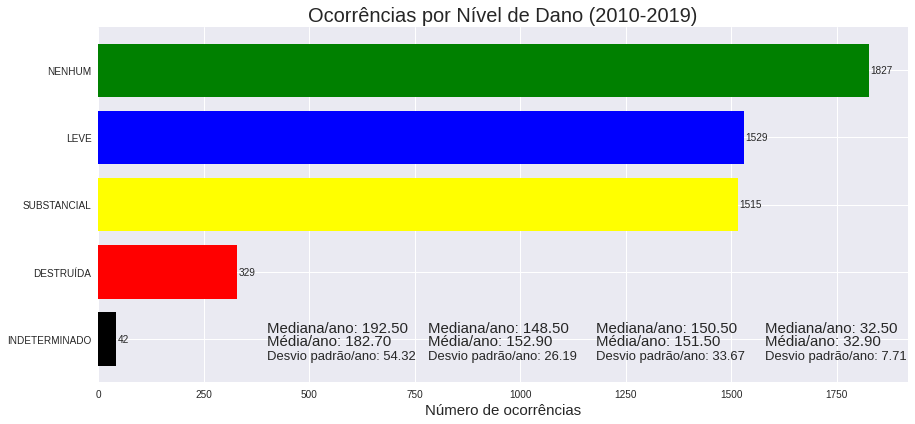

In [ ]:
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize=(13, 6))

x=fase_aeronave_nivel_dano
y=contador_aeronave_nivel_dano

#ax.barh(x, y, color='black')
ax.barh(x, y, color=['g','blue','yellow','red','black'])

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências',size=15)

plt.title('Ocorrências por Nível de Dano (2010-2019)',size=20)
plt.text(400, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_nenhum_ano['NENHUM']))),size=15)
plt.text(400, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_nenhum_ano['NENHUM']))),size=15)
plt.text(400, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_nenhum_ano['NENHUM'])),size=13)

plt.text(780, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_leve_ano['LEVE']))),size=15)
plt.text(780, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_leve_ano['LEVE']))),size=15)
plt.text(780, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_leve_ano['LEVE'])),size=13)

plt.text(1180, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_substancial_ano['SUBSTANCIAL']))),size=15)
plt.text(1180, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_substancial_ano['SUBSTANCIAL']))),size=15)
plt.text(1180, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_substancial_ano['SUBSTANCIAL'])),size=13)

plt.text(1580, 3.9, 'Mediana/ano: %.2f'%(np.median(np.array(qtd_destruida_ano['DESTRUÍDA']))),size=15)
plt.text(1580, 4.1, 'Média/ano: %.2f'%(np.mean(np.array(qtd_destruida_ano['DESTRUÍDA']))),size=15)
plt.text(1580, 4.3, 'Desvio padrão/ano: %.2f'%(static.stdev(qtd_destruida_ano['DESTRUÍDA'])),size=13)
plt.tight_layout(w_pad=4, h_pad=3)

Ao analisar o grafico é visto que a maior parte das ocorrências não gerou dano à aeronave,pois grande parte dos casos foram incidentes(“evento não planejado que tinha o potencial de levar a um acidente.”)

A menor parte das ocorrências no período, gerou danos indeterminados ou seja não foi possivel determinar as condições da aeronave

A média de ocorrências sem danos foi de 182,70 por ano.

A média de ocorrências com danos leves foi de 152,90 por ano.

A média de ocorrências com danos substanciais foi de 151,50 por ano.

A média de ocorrências destruindo a aeronave foi de 32,90 por ano.

#Status da Investigação

In [ ]:
#FINALIZADA
status_finalizada= list(set(acidentes['ano']))
dados_status_finalizada = list(acidentes.loc[(acidentes['status_investigacao']) == 'FINALIZADA', ['ano']]['ano'])
qtd_status_finalizada_ano = pd.DataFrame({'ANO': status_finalizada, 'FINALIZADA': [dados_status_finalizada.count(i) for i in status_finalizada]})
qtd_status_finalizada_ano = qtd_status_finalizada_ano.sort_values(['FINALIZADA'])
soma_status_finalizada= qtd_status_finalizada_ano['FINALIZADA'].sum()

In [ ]:
#ATIVA
status_ativa= list(set(acidentes['ano']))
dados_status_ativa = list(acidentes.loc[(acidentes['status_investigacao']) == 'ATIVA', ['ano']]['ano'])
qtd_status_ativa_ano = pd.DataFrame({'ANO': status_ativa, 'ATIVA': [dados_status_ativa.count(i) for i in status_ativa]})
qtd_status_ativa_ano = qtd_status_ativa_ano.sort_values(['ATIVA'])
soma_status_ativa= qtd_status_ativa_ano['ATIVA'].sum()

In [ ]:
#INDETERMINADA
status_indeterminada= list(set(acidentes['ano']))
dados_status_indeterminada = list(acidentes.loc[(acidentes['status_investigacao']) == 'INDETERMINADA', ['ano']]['ano'])
qtd_status_indeterminada_ano = pd.DataFrame({'ANO': status_indeterminada, 'INDETERMINADA': [dados_status_indeterminada.count(i) for i in status_indeterminada]})
qtd_status_indeterminada_ano = qtd_status_indeterminada_ano.sort_values(['INDETERMINADA'])
soma_status_indeterminada= qtd_status_indeterminada_ano['INDETERMINADA'].sum()

In [ ]:
status_investigacao = Counter(acidentes['status_investigacao'])
fase_status_investigacao = sorted(status_investigacao, key = status_investigacao.get, reverse = True)
contador_status_investigacao = sorted(list(status_investigacao.values()), reverse = True)

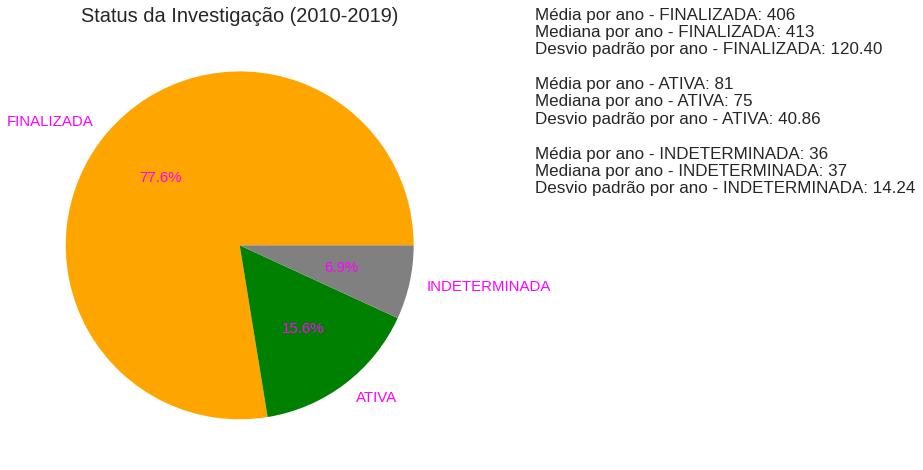

In [ ]:
plt.style.use("ggplot")

plt.title('Status da Investigação (2010-2019)',size=20)

plt.text(1.7, 1.2, 'Mediana por ano - FINALIZADA: %d'%(np.median(np.array(qtd_status_finalizada_ano['FINALIZADA']))),size=17)
plt.text(1.7, 1.3, 'Média por ano - FINALIZADA: %d'%(np.mean(np.array(qtd_status_finalizada_ano['FINALIZADA']))),size=17)
plt.text(1.7, 1.1, 'Desvio padrão por ano - FINALIZADA: %.2f'%(static.stdev(qtd_status_finalizada_ano['FINALIZADA'])),size=17)

plt.text(1.7, 0.8, 'Mediana por ano - ATIVA: %d'%(np.median(np.array(qtd_status_ativa_ano['ATIVA']))),size=17)
plt.text(1.7, 0.9, 'Média por ano - ATIVA: %d'%(np.mean(np.array(qtd_status_ativa_ano['ATIVA']))),size=17)
plt.text(1.7, 0.7, 'Desvio padrão por ano - ATIVA: %.2f'%(static.stdev(qtd_status_ativa_ano['ATIVA'])),size=17)

plt.text(1.7, 0.4, 'Mediana por ano - INDETERMINADA: %d'%(np.median(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))),size=17)
plt.text(1.7, 0.5, 'Média por ano - INDETERMINADA: %d'%(np.mean(np.array(qtd_status_indeterminada_ano['INDETERMINADA']))),size=17)
plt.text(1.7, 0.3, 'Desvio padrão por ano - INDETERMINADA: %.2f'%(static.stdev(qtd_status_indeterminada_ano['INDETERMINADA'])),size=17)

status = acidentes['status_investigacao'].value_counts().plot(kind='pie',
autopct='%1.1f%%',
label='',
figsize=(15,8),
colors = ( "orange", "G","grey"),
textprops = dict(color ="magenta",size=15))


Analisando o gráfico podemos notar que a maior parte das ocorrências teve sua investigação finalizada, representando 77,6% na totalidade, e este resultado se dá pois a maior parte dos casos são de  baixa gravidade.

A menor parte das ocorrências teve sua investigação indeterminada, representando 6,9% do total

A média dos casos finalizados foi de 413/ano.

A média dos casos ativos foi de 81/ano.

A média dos casos indeterminados foi de 36/ano.

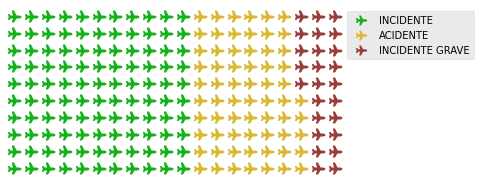


Representatividade - Tipo de Ocorrências

INCIDENTE          55.07
ACIDENTE           32.32
INCIDENTE GRAVE    12.61
Name: tipo, dtype: float64


In [ ]:
#Análise de representatividade dos tipos de ocorrências.
data = acidentes.tipo.value_counts().to_dict()

# plotando gráfico de waffle
 
fig = plt.figure(
                FigureClass=Waffle,
                rows=10,
                columns=20,
                colors=("#15B01A", "#DCB732", "#983D3D"),
                values=data, icons='plane', icon_size=12,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True
                         )
fig.set_tight_layout(False)

plt.show();

# mostrar a porcentagem de cada tipo de incidente na base
print('\nRepresentatividade - Tipo de Ocorrências\n')
percentual = round((acidentes.tipo.value_counts() / acidentes.shape[0])*100.,2)
print(percentual)







*   Podemos observar que na análise acima os **incidentes** menos graves são os maiores com uma representativade de **55,07%**. Seguidos dos acidentes com **32,32%** e os incidentes graves com **12,61%** do total. A análise acima está relacionada com a segurança do transporte aéreo, podendo afirmar que os maiores casos são apenas incidentes.




In [ ]:
#lista das ocorrências por tipo de aeronave, contando a quantidade de ocorrências de cada uma
aeronave_tipo = Counter(acidentes['aeronave_tipo'])

#os tipos de aeronave individualmente, ordenados ascendemente
tipo = sorted(aeronave_tipo, key = aeronave_tipo.get, reverse = True)

#a quantidade de ocorrências, ordenados ascendemente
contador_tipo = sorted(list(aeronave_tipo.values()), reverse = True)

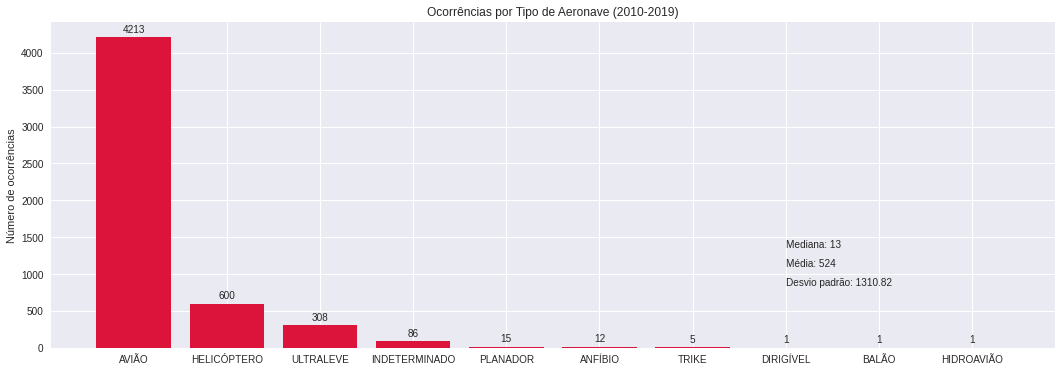


Representatividade - Tipo de Aeronaves

AVIÃO            80.37
HELICÓPTERO      11.45
ULTRALEVE         5.88
INDETERMINADO     1.64
PLANADOR          0.29
ANFÍBIO           0.23
TRIKE             0.10
DIRIGÍVEL         0.02
BALÃO             0.02
HIDROAVIÃO        0.02
Name: aeronave_tipo, dtype: float64


In [ ]:
# Visualizando a análise por tipo de aeronave em um gráfico de
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize=(18, 6))

x=tipo
y=contador_tipo

rects1=ax.bar(x, y,color='crimson')

ax.set_xticks(x)
plt.ylabel("Número de ocorrências")
plt.title('Ocorrências por Tipo de Aeronave (2010-2019)')
plt.text(7, 1200.9, 'Mediana: %d\n'%(np.median(np.array(contador_tipo))))
plt.text(7, 1100.9, 'Média: %d'%(np.mean(np.array(contador_tipo))))
plt.text(7, 850.8, 'Desvio padrão: %.2f'%(static.stdev(contador_tipo)))   

rotulo_linhas(rects1, ax)

plt.show()

print('\nRepresentatividade - Tipo de Aeronaves\n')
percentual_tipo_aeronaves = round((acidentes.aeronave_tipo.value_counts() / acidentes.shape[0])*100.,2)
print(percentual_tipo_aeronaves)

Ao analisar os dados acima percebemos que o tipo de aeronave que mais ocorre ocorrências é o avião com **80,37%** dos casos. Quanto as aeronaves dirígvel, Balão e Hidroavião são os menores. 
A média também é elevada **524** por conta das ocorrências em aviões, o que também eleva o número do Desvio Padrão.



#Séries Temporais: Análises por Hora, Dia, Mês e Ano.

In [ ]:
#Extração dos dados de "Data" do Dataset.
acidentes['data'] = pd.to_datetime(acidentes['data'])
acidentes['Mes'] = acidentes['data'].map(lambda x: x.month)
acidentes['Dia'] = acidentes['data'].map(lambda x: x.day)

In [ ]:
data = acidentes['data'] = pd.to_datetime(acidentes['data'])
volume = acidentes.shape[0]

In [ ]:
ocorrencias_por_mes = Counter(acidentes['Mes'])
meses = (list(ocorrencias_por_mes.keys()))
ocorrencia_mes = (list(ocorrencias_por_mes.values()))

In [ ]:
ocorrencias_por_data = Counter(acidentes['data'])

In [ ]:
ocorrencias_por_dia = Counter(acidentes['Dia'])
dia = list(ocorrencias_por_dia.keys())
ocorrencia_dia = list(ocorrencias_por_dia.values())

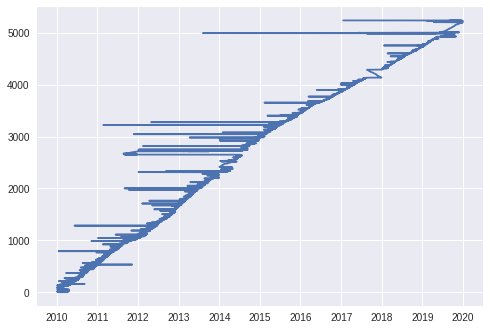

In [ ]:
plt.plot(acidentes.data , acidentes.index)


## REGRESSÃO LINEAR - OCORRENCIAS CENIPA

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
logreg_model = LinearRegression()

In [ ]:
import statsmodels.api as sm

X = acidentes['aeronave_ano_fabricacao']
y = acidentes['aeronaves_envolvidas']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                             
Dep. Variable:     aeronaves_envolvidas   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     3.530
Date:                  Tue, 26 Apr 2022   Prob (F-statistic):             0.0603
Time:                          19:53:22   Log-Likelihood:                 4059.3
No. Observations:                  5242   AIC:                            -8115.
Df Residuals:                      5240   BIC:                            -8102.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const 

## Regressão Linear - Aeronaves Envolvidas

In [ ]:
# Criando um DataFrame
dataframe = pd.DataFrame()
dataframe['x'] = acidentes['aeronave_ano_fabricacao']
dataframe['y'] = acidentes['aeronaves_envolvidas']
x_values = dataframe[['x']]
y_values = dataframe[['y']]

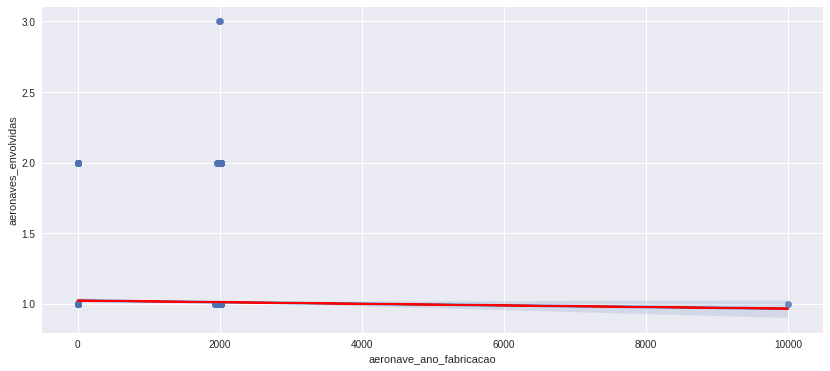

In [ ]:
# Plotando o gráfico da regressão
plt.figure(figsize=(14,6))

#plt.scatter(dataframe['x'].values, dataframe['y'].values)
sns.regplot(x='aeronave_ano_fabricacao', y='aeronaves_envolvidas', data=acidentes)

# Colocando a linha da regressão
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)

# Plotando um gráfico em cima de outro gráfico
plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()

In [ ]:
acidentes['status_investigacao'].value_counts()

FINALIZADA       4066
ATIVA             816
INDETERMINADA     360
Name: status_investigacao, dtype: int64